In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#import statsmodels.api as sm

In [2]:
crime = pd.read_csv("./datasets/crime.csv")
vidya = pd.read_csv("./datasets/vgsales.csv")

In [3]:
crime[1:5]

,Year,population,Violent crime,Property crime,Murder and non-negligent man-slaughter,Forcible rape,Robbery,Aggravated assault,Burglary,Larceny-theft,Motor vehicle theft
1,1982,231664458,1322390,11652000,21010,78770,553130,669480,3447100,7142500,1062400
2,1983,233791994,1258087,10850543,19308,78918,506567,653294,3129851,6712759,1007933
3,1984,235824902,1273282,10608473,18692,84233,485008,685349,2984434,6591874,1032165
4,1985,237923795,1327767,11102590,18976,87671,497874,723246,3073348,6926380,1102862


In [4]:
vidya.sort_values(by=["Year"])[1:5]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
2669,2671,Boxing,2600,1980.0,Fighting,Activision,0.72,0.04,0.0,0.01,0.77
5366,5368,Freeway,2600,1980.0,Action,Activision,0.32,0.02,0.0,0.00,0.34
1969,1971,Defender,2600,1980.0,Misc,Atari,0.99,0.05,0.0,0.01,1.05
1766,1768,Kaboom!,2600,1980.0,Misc,Activision,1.07,0.07,0.0,0.01,1.15


<AxesSubplot:xlabel='Year', ylabel='NA_Sales'>

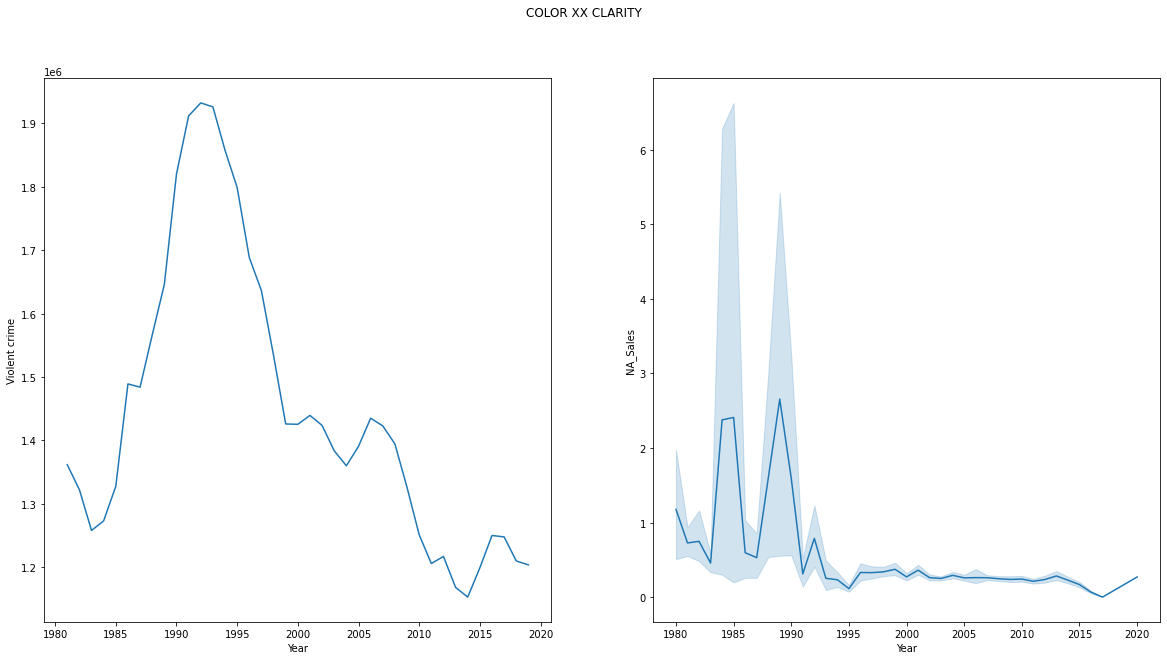

In [6]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (20,10), sharex=False)
fig.suptitle('COLOR XX CLARITY')
sns.lineplot(x="Year", y="Violent crime",
             data=crime, ax=ax1)
sns.lineplot(x="Year", y="NA_Sales",
             data=vidya, ax=ax2)